In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

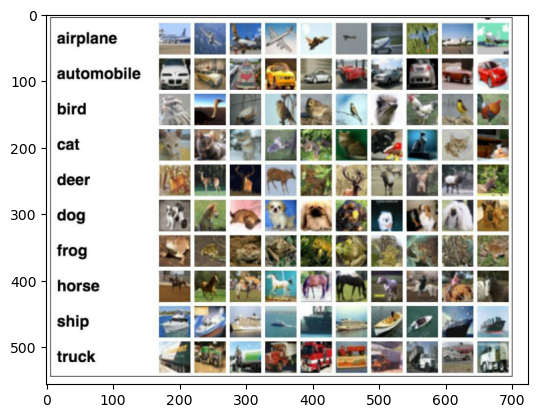

Image Displayed from Any Location


In [77]:
import matplotlib.pyplot as plt

# Specify the image file path
image_path = r"C:\Users\Krishna\Downloads\Kaggleimage.png"

# Read the image using matplotlib
img = plt.imread(image_path)

# Display the image
plt.imshow(img)
plt.show()
print("Image Displayed from Any Location")

In [79]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [81]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the CNN model
model = Sequential()

# Input layer
model.add(Input(shape=(32, 32, 3)))

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [83]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.2796 - loss: 1.9269 - val_accuracy: 0.5040 - val_loss: 1.3706
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.4900 - loss: 1.4171 - val_accuracy: 0.5687 - val_loss: 1.2065
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5596 - loss: 1.2484 - val_accuracy: 0.6107 - val_loss: 1.0911
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6007 - loss: 1.1356 - val_accuracy: 0.6199 - val_loss: 1.0447
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.6287 - loss: 1.0579 - val_accuracy: 0.6630 - val_loss: 0.9564
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6558 - loss: 0.9785 - val_accuracy: 0.6625 - val_loss: 0.9507
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.6817 - loss: 0.9187 - val_accuracy: 0.6881 - val_loss: 0.8931
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6965 - loss: 0.8687 - 

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

    airplane       0.78      0.69      0.73      1000
  automobile       0.84      0.82      0.83      1000
        bird       0.49      0.70      0.58      1000
         cat       0.54      0.45      0.49      1000
        deer       0.71      0.58      0.64      1000
         dog       0.53      0.66      0.59      1000
        frog       0.79      0.77      0.78      1000
       horse       0.81      0.67      0.73      1000
        ship       0.78      0.81      0.80      1000
       truck       0.82      0.79      0.81      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000

[[691  22 116  12  11   5   6   9  91  37]
 [ 20 818  14  13   2  10  10   5  33  75]
 [ 45   7 701  45  60  64  48  18  10   2]
 [ 14   6 133 450  43 250  52  12  21  19]
 [ 16   2 144  58 579  62  4

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


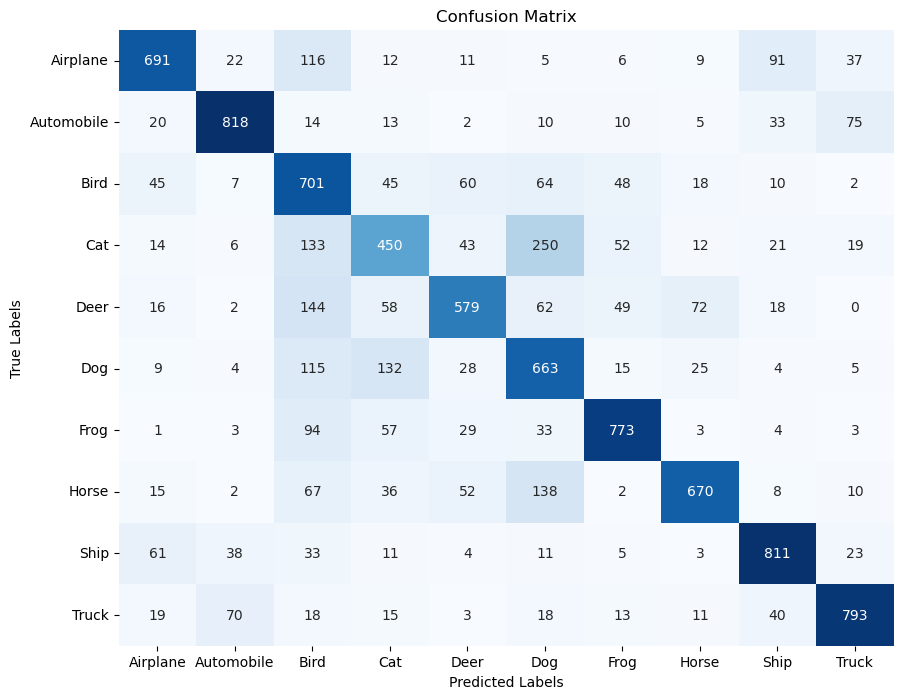

In [87]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
# Assuming y_pred is your model predictions and y_true are the true labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Set up the figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
            yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [89]:
# Extract metrics from classification report
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')
accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
# For specificity, we calculate TN for each class
tn = cm.diagonal()
fp = cm.sum(axis=0) - tn
fn = cm.sum(axis=1) - tn

specificity = tn / (tn + fp)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity}')


Accuracy: 0.6949
Precision: 0.7095
Recall: 0.6949
F1 Score: 0.6974
Specificity: [0.77553311 0.84156379 0.48850174 0.54282268 0.71393342 0.52870813
 0.79445015 0.80917874 0.77980769 0.82006205]


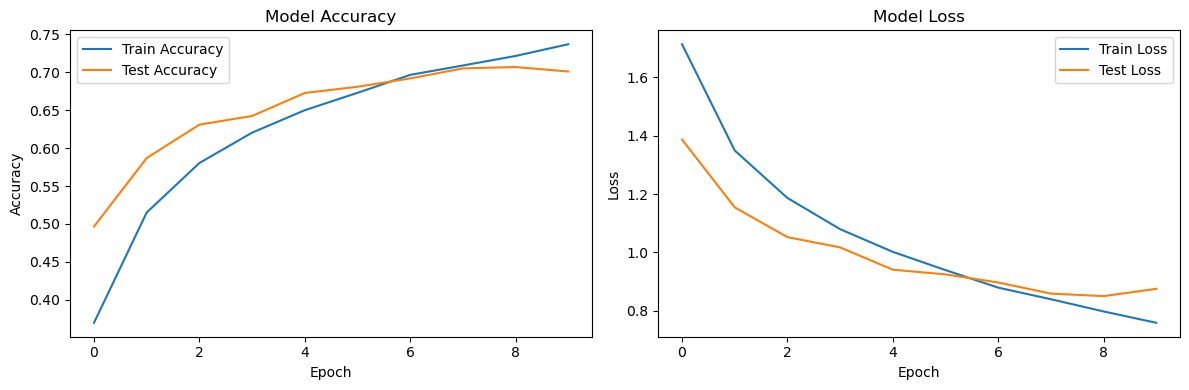

In [75]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
